In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dfx=pd.read_csv("Logistic_X_train.csv")
dfy=pd.read_csv("Logistic_Y_train.csv")

In [3]:
f1=dfx[['f1']].values
f2=dfx[['f2']].values
f3=dfx[['f3']].values
x=f1
x=np.hstack((f1,f2))
x=np.hstack((x,f3))
f1.reshape((-1,))
f2.reshape((-1,))
f3.reshape((-1,))
f4=dfy[['label']].values
f4.reshape((-1,))
y = dfy[['label']].values
y = y.reshape((-1))

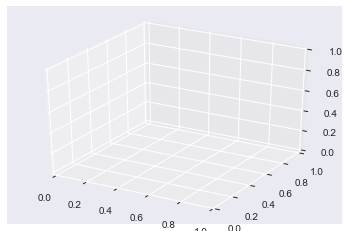

In [4]:
fig=plt.figure()
ax=plt.axes(projection="3d")
plt.show()

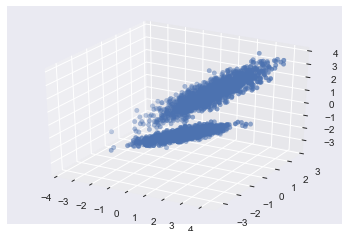

In [5]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2,f3,f1,  cmap='hsv')
plt.show()

In [6]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [7]:
def sigmoid(x):
    return(1.0/(1.0 + np.exp(-1.0*x)))

In [8]:
def error(x,y,w,b):
    err=0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=(y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx))
    return err


In [9]:
def gradient(x,y,w,b):
    m=x.shape[0]
    grad_b=0.0
    grad_w=np.zeros(w.shape)
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_b+=y[i]-hx
        grad_w+=(y[i]-hx)*x[i]
    grad_b/=m
    grad_w/=m
    return grad_b,grad_w

In [10]:
def gradientdescent(x,y,w,b,learningrate=0.01):
    err=error(x,y,w,b)
    grad_w,grad_b=gradient(x,y,w,b)
    w+=learningrate*grad_w
    b+=learningrate*grad_b
    return err,w,b

In [11]:
def predict(x,w,b):
    confidence=hypothesis(x,w,b)
    if confidence>0.5:
        return 1
    else:
        return 0

In [12]:
def get_acc(x_test,y_test,w,b):
    pred = []
    m = y_test.shape[0]
    for i in range(m):
        p = predict(x_test[i],w,b)
        pred.append(p)
    
    pred = np.array(pred)
    
    return float(((pred == y_test).sum())/m)

In [13]:
loss=[]
acc=[]
W=np.zeros((x.shape[1],))
b=0

In [15]:
for i in range(1,10000):
    l,W,b=gradientdescent(x,y,W,b,learningrate=0.1)
    loss.append(l)

C:\Users\shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
C:\Users\shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


In [ ]:
plt.plot(loss)
plt.show()

In [ ]:
X_test = pd.read_csv("Logistic_X_Test.csv")

In [ ]:
f1_test = X_test[['f1']].values
f2_test = X_test[['f2']].values
f3_test = X_test[['f3']].values

f1_test = f1_test.reshape((-1,))
f2_test = f2_test.reshape((-1,))
f3_test = f3_test.reshape((-1,))

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2,f3,f1,  cmap='hsv')
#plt.show()

xt = f2
yt = f3
zt = -((W[1]*xt + W[2]*yt + b)/W[0])

ax.plot3D(xt,yt,zt,color = 'k',alpha = 0.2)
plt.show()